# Module 6 - Programming Assignment

## Directions

1. Change the name of this file to be your JHED id as in `jsmith299.ipynb`. Because sure you use your JHED ID (it's made out of your name and not your student id which is just letters and numbers).
2. Make sure the notebook you submit is cleanly and fully executed. I do not grade unexecuted notebooks.
3. Submit your notebook back in Blackboard where you downloaded this file.

*Provide the output **exactly** as requested*

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import networkx as nx
from copy import deepcopy

**For this assignment only**

If you want to use NetworkX with your assignment, you can do:

```
conda install networkx
```
or

```
pip install networkx
```

Additionally, this assignment uses a recursive algorithm. You should use `deecopy` at the appropriate places to avoid entanglement issues.

1. Follow the pseudocode in the book exactly.
2. Learn about the [Four Color Theorem](http://en.wikipedia.org/wiki/Four_color_theorem).


These links are to help me navigate your notebook:

1. [Four Color Connecticut](#four_ct)
2. [Three Color Connecticut](#three_ct)
3. [Four Color Europe](#four_eu)
4. [Three Color Europe](#three_eu)


## CSP: Map Coloring

In this programming assignment, you will be using your new understanding of **Constraint Satisfaction Problems** to color maps. As we know from the [Four Color Theorem](http://en.wikipedia.org/wiki/Four_color_theorem) any division of a plane into contiguous regions can be colored such that no two adjacent regions are the same color by using at most four colors.

From the book, we know that we can translate this problem into a CSP where the map is represented as a [planar graph](http://en.wikipedia.org/wiki/Planar_graph) and the goal is to color all the nodes such that no adjacent nodes are colored the same color.

As with most AI problems, this requires us to figure out how best to represent the problem--and the solution--given the high and low level data structures and types at our disposal. For this problem, we'll settle on a Dict which contains at least two keys: "nodes" which is an *ordered* List of Strings that represents each node or vertex in the planar graph and "edges" which contains a List of Tuples that represent edges between nodes. The Tuples are of ints that represent the index of the node in the "nodes" list.

Using this system, and adding a "coordinates" key with abstract drawing coordinates of each node for NetworkX, we can represent the counties of Connecticut like so:

In [2]:
connecticut = {
    'coordinates': [(46, 52), (217, 146), (65, 142), (147, 85), (162, 140),
                 (104, 77), (197, 94), (123, 142)],
    'edges': [(0, 2), (0, 5), (2, 5), (2, 7), (5, 7), (5, 3), (7, 3), (7, 4),
           (7, 6), (3, 6), (4, 6), (4, 1), (6, 1)],
    'nodes': ['Fairfield', 'Windham', 'Litchfield', 'Middlesex', 'Tolland',
           'New Haven', 'New London', 'Hartford']}
print(connecticut)

{'coordinates': [(46, 52), (217, 146), (65, 142), (147, 85), (162, 140), (104, 77), (197, 94), (123, 142)], 'edges': [(0, 2), (0, 5), (2, 5), (2, 7), (5, 7), (5, 3), (7, 3), (7, 4), (7, 6), (3, 6), (4, 6), (4, 1), (6, 1)], 'nodes': ['Fairfield', 'Windham', 'Litchfield', 'Middlesex', 'Tolland', 'New Haven', 'New London', 'Hartford']}


The coordinates permit us to use NetworkX to draw the graph. We'll add a helper function for this, `draw_map`, which takes our planar_map, a figure size in abstract units, and a List of color assignments in the same order as the nodes in the planar_map.  The underlying drawings are made by matplotlib using NetworkX on top of it. Incidentally, the positions just make the map "work out" on NetworkX/matplotlib.

The size parameter is actually inches wide by inches tall (8, 10) is an 8x10 sheet of paper. Why doesn't a chart cover up the whole screen then? It's adjusted by dpi. On high resolution monitors, 300 dpi with 8x10 inches might only take up a fraction of that space. Use whatever you want to make the output look good. It doesn't matter for anything else but that.

A default value for `color_assignments` is provided, `None`, that simply colors all the nodes red. Otherwise, `color_assignments` must be a `List of Tuples` where each `Tuple` is a node name and assigned color. The order of `color_assignments` must be the same as the order of `"nodes"` in the `planar_map`.


<div style="background: lemonchiffon; margin:20px; padding: 20px;">
    <strong>Important</strong>
    <p>Do not use NetworkX nodes as the data structure for your assignment.
    We are only using it to color the maps.
    Use basic Python data structures as specified in the general programming requirements.</p>
</div>


In [3]:
def draw_map(name, planar_map, size, color_assignments=None):
    def as_dictionary(a_list):
        dct = {}
        for i, e in enumerate(a_list):
            dct[i] = e
        return dct
    
    G = nx.Graph()
    
    labels = as_dictionary(planar_map["nodes"])
    pos = as_dictionary(planar_map["coordinates"])
    
    # create a List of Nodes as indices to match the "edges" entry.
    nodes = [n for n in range(0, len(planar_map["nodes"]))]

    if color_assignments:
        colors = [c for n, c in color_assignments]
    else:
        colors = ['red' for c in range(0,len(planar_map[ "nodes"]))]

    G.add_nodes_from(nodes)
    G.add_edges_from(planar_map[ "edges"])

    plt.figure(figsize=size, dpi=100)
    plt.title(name)
    nx.draw(G, node_color = colors, with_labels = True, labels = labels, pos = pos)
    
    plt.show()
#    plt.savefig(name + ".png")

Using this function, we can draw `connecticut`:

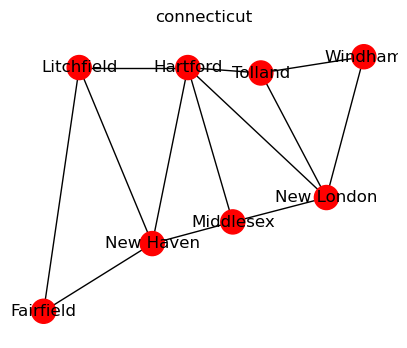

In [4]:
draw_map("connecticut", connecticut, (5,4), [(n, "red") for n in connecticut["nodes"]])

This coloring obviously has some problems! You're going to write a program to fix it.

So what we (and by "we", I mean "you") would like to do is write a program that can figure out how to color a planar map...ie, `connecticut` *and* `europe`, you will do it by implementing a function that uses the algorithms that were discussed in this module.

## Which CSP Algorithms?

You will need to implement **backtracking** and **forward checking**. Look at the pseudocode for `backtracking_search` on p. 192 of AIAMA 4th Edition.

You *must* implement **Degree Heuristic** (to pick variables) and **Least Constraining Value** (to pick values).
You *may* implement **Minimum Remaining Values** as a tie breaker, if you like.
Otherwise, break ties in ascending order (least to most).
(Which functions in the pseudocode represent the heuristics?).

You should get the backtracking and forward checking implemented first. 
Then add the heuristics. 
You must use the pseudocode in the book and then stub out the functions that implement the "pick a variable" heuristic and the "pick a value" heuristic. 
When you get it working, fill in the appropriate heuristic mentioned above.

Please change the "?" below into "yes" or "no" indicating which elements you were able to implement:

```
Required:
    backtracking: yes
    forward checking: yes
    degree heuristic: yes
    least contraining value: yes
Optional:    
    minimum remaining values: yes
```  

Your function should take the following form:

```python
def color_map( planar_map, color_list, trace=False)
```

where `planar_map` has the format described above, colors is a List of Strings denoting the colors to use and `trace` operates as described in the next paragraph. It should return a List of Tuples where each Tuple is of the form `( Node Name, Color)` in the same order as the `node` entry in the planar_map. For example, if we had `["A", "B"]` as nodes and `["Yellow", "Green"]` as colors, your function might return `[("A", "Yellow"), ("B", "Green")]`. If a coloring cannot be found, return `None`.

Your function also will take an optional argument, `trace`, with a default value of `False`.

If `trace` is set to `True` your program will print out *traces* (or debugging) statements that show what it is currently doing (in terms of the algorithms you are supposed to implement):

1. The variable selected and why.
2. The values proposed in order.
3. backtracking detected by forward checking (empty domains).

Don't print out a lot of noise.

As usual, you should implement your function using helper functions, using one Markdown cell for documentation and one Codecell for implementation (one function and assertions).

-----

## `is_safe` <a id="is_safe"></a>

**Description:**
This function checks whether or not the selected color for a node is "safe". It does so by checking any neighboring nodes to ensure they do not have the same color. This is integral to our code as we need to be able to determine what is and is not a safe color to assign.

**Parameters:**
- `node` (`int`): Selected node that we are attempting to assign.
- `color` (`string`): Color that is being set for the node value
- `assignment` (`dict{int: string}`): Dictionary of the already assigned nodes
- `graph` (`nx.Graph`): Graph that we are working on

**Returns:**
- `Bool`: Returns `True` if the selected color is safe, and `False` if the selected color creates conflicts.

In [5]:
def is_safe(node, color, assignment, graph):
    for neighbor in graph.neighbors(node):
        if neighbor in assignment and assignment[neighbor] == color:
            return False
    return True

In [6]:
G = nx.Graph()
G.add_nodes_from(range(len(connecticut['nodes'])))
G.add_edges_from(connecticut['edges'])

assert is_safe(1, 'red', {7: 'red', 5: 'blue', 6: 'blue', 2: 'green', 3: 'green', 4: 'green', 0: 'red'}, G) == True # Should be safe to set 1 to red
assert is_safe(2, 'red', {7: 'red', 5: 'blue', 6: 'blue', 3: 'green', 4: 'green', 0: 'red'}, G) == False # Should not be safe to set 2 to red
assert is_safe(2, 'green', {7: 'red', 5: 'blue', 6: 'blue', 3: 'green', 4: 'green', 0: 'red'}, G) == True # 2 should be green

## `forward_checking` <a id="forward_checking"></a>

**Description:**
This function performs forward checking by updating domains of neigboring nodes after a color is assigned to a node. It will remove the assigned color fro the domain of neigboring nodes and checks to ensure all neighbors are valid (if any are found to not be valid it returns False). This is integral to color_map function as it is one of the steps that ensures we do not block ourselves off from the answer by choosing a node to be a certain color.

**Parameters:**
- `node` (`int`): Selected node that has been assigned a color.
- `color` (`string`): Color that is being set for the node value
- `domains` (`dict{int: list[string]}`): Dictionary of the domains of each node
- `graph` (`nx.Graph`): Graph that we are working on

**Returns:**
- `tuple[bool, dict]`: Returns a tuple where the first value is `True` if forward checking is valid, and `False` if not. The second value is the updated domains post forward checking

In [28]:
def forward_checking(node, color, domains, graph, trace=False):
    local_domains = deepcopy(domains) # Copy the domains to ensure we do not mess anything up if the forward checking fails
    for neighbor in graph.neighbors(node):
        if color in local_domains[neighbor]:
            local_domains[neighbor].remove(color)
            if len(local_domains[neighbor]) == 0:
                if trace:
                    print(f"Backtracking detected: Empty domain for node {neighbor} after assigning {color} to node {node}.")
                return False, local_domains
    return True, local_domains

In [8]:
G = nx.Graph()
G.add_nodes_from(range(len(connecticut['nodes'])))
G.add_edges_from(connecticut['edges'])

assert forward_checking(0, 'red', {0: ['red', 'blue'], 5: ['red', 'blue'], 2: ['green']}, G) == (True, {0: ['red', 'blue'], 5: ['blue'], 2: ['green']}) # True as it leaves no domains empty
assert forward_checking(1, 'blue', {4: ['blue'], 2: ['green']}, G) == (False, {4: [], 2: ['green']}) # False as it leaves 4 empty
assert forward_checking(0, 'green', {2: ['green'], 5: ['green']}, G) == (False, {2: [], 5: ['green']}) # False as it leaves 2 empty, also shows it stops early since it already found false 

## `select_unassigned_variables` <a id="select_unassigned_variables"></a>

**Description:**
This function chooses the next node that is not assigned. It does this by utilizing a degree heuristic to choose the node that has the highest degree. If that returns more than one choice it moves on to MRV, selecting the node with the fewest possible remaining colors in its domain. This is integral to color_map as it ensures we are choosing the "most important" node to set next, this enables us to not set cetain nodes too early or late causing our code to fail.

**Parameters:**
- `assignment` (`dict{int: list[string]}`): Dictionary of the current node assignments.
- `domains` (`dict{int: list[string]}`): Dictionary of the domains of each node
- `graph` (`nx.Graph`): Graph that we are working on

**Returns:**
- `node` (`int`): Returns the node selected via degree heuristic and if necessary MRV

In [9]:
def select_unassigned_variable(assignment, domains, graph, trace=False):
    unassigned_nodes = [node for node in graph.nodes if node not in assignment]
    # Sort by degree first (highest degree), then by MRV (fewest remaining values) if there is a tie
    node = sorted(unassigned_nodes, key=lambda x: (-len(list(graph.neighbors(x))), len(domains[x])))[0]
    
    if trace:
        reason = f"selected due to highest degree of {len(list(graph.neighbors(node)))}"
        print(f"Variable selected: Node {node}, {reason}.")

    return node

In [10]:
G = nx.Graph()
G.add_nodes_from(range(len(connecticut['nodes'])))
G.add_edges_from(connecticut['edges'])

domains = {0: ['red', 'blue', 'green', 'yellow'], 1: ['red', 'blue', 'green', 'yellow'], 2: ['red', 'blue', 'green', 'yellow'], 3: ['red', 'blue', 'green', 'yellow'], 4: ['red', 'blue', 'green', 'yellow'], 5: ['red', 'blue', 'green', 'yellow'], 6: ['red', 'blue', 'green', 'yellow'], 7: ['red', 'blue', 'green', 'yellow']}

# What should be the order from the degree and MRV: [7, 5, 6, 2, 3, 4, 0, 1]
assert select_unassigned_variable({}, domains, G) == 7 # 7 is highest degree
assert select_unassigned_variable({7: 'red'}, domains, G) == 5 # As 5 is now highest degree as 7 is asssigned
assert select_unassigned_variable({7:'red', 5:'blue'}, domains, G) == 6 # 6 is now highest degree as 7 and 5 are assigned

## `count_conflicts` <a id="count_conflicts"></a>

**Description:**
This function calculates the number of conflicts a particular color assignment for a node would create. This is necessary for the LCV part of our code to work as it needs to keep track of which colors have the least constraining values.

**Parameters:**
- `node` (`int`): Node it is checking conflicts for
- `assignment` (`dict{int: list[string]}`): Dictionary of the current node assignments.
- `domains` (`dict{int: list[string]}`): Dictionary of the domains of each node
- `graph` (`nx.Graph`): Graph that we are working on

**Returns:**
- `int`: Number of conflicts that would arise if a certain color was chose for the specified node

In [11]:
def count_conflicts(value, node, domains, graph):
    conflicts = 0
    for neighbor in graph.neighbors(node):
        if value in domains[neighbor]:
            conflicts += 1
    return conflicts

In [12]:
G = nx.Graph()
G.add_nodes_from(range(len(connecticut['nodes'])))
G.add_edges_from(connecticut['edges'])

domains = {0: ['red', 'blue', 'green', 'yellow'], 1: ['red', 'blue', 'green', 'yellow'], 2: ['red', 'blue', 'green', 'yellow'], 3: ['red', 'blue', 'green', 'yellow'], 4: ['red', 'blue', 'green', 'yellow'], 5: ['red', 'blue', 'green', 'yellow'], 6: ['red', 'blue', 'green', 'yellow'], 7: ['red', 'blue', 'green', 'yellow']}

assert count_conflicts('red', 0, domains, G) == 2 # Should have 2 conflicts as its neighbors 2 and 5 both have red
domains[2] = ['blue', 'green', 'yellow']
assert count_conflicts('red', 0, domains, G) == 1 # Only 1 conflict as 2 no longer has red in its domain
domains[5] = ['blue', 'green', 'yellow']
assert count_conflicts('red', 0, domains, G) == 0 # No conflicts as neither 5 or 2 have red in their domain


## `order_domain_values` <a id="order_domain_values"></a>

**Description:**
This function orders the possible color values based on LCV. This is necessary for color map to keep track of which colors are going to cause the least "problems" if they are set.

**Parameters:**
- `node` (`int`): Node it is sorting the colors of
- `domains` (`dict{int: list[string]}`): Dictionary of the domains of each node
- `graph` (`nx.Graph`): Graph that we are working on

**Returns:**
- `List`: A list of colors for the node ordered by LCV.

In [13]:
def order_domain_values(node, domains, graph, trace=False):
    ordered_values = sorted(domains[node], key=lambda value: count_conflicts(value, node, domains, graph))
    if trace:
        print(f"Values proposed for node {node}: {ordered_values} (in order of least constraining).")
    return ordered_values

In [14]:
G = nx.Graph()
G.add_nodes_from(range(len(connecticut['nodes'])))
G.add_edges_from(connecticut['edges'])

domains = {0: ['red', 'blue', 'green', 'yellow'], 1: ['red', 'blue', 'green', 'yellow'], 2: ['red', 'blue', 'green', 'yellow'], 3: ['red', 'blue', 'green', 'yellow'], 4: ['red', 'blue', 'green', 'yellow'], 5: ['red', 'blue', 'green', 'yellow'], 6: ['red', 'blue', 'green', 'yellow'], 7: ['red', 'blue', 'green', 'yellow']}

assert order_domain_values(0, domains, G) == ['red', 'blue', 'green', 'yellow'] # Should return domain as all colors are equal so no need to reorder
domains[2] = ['red', 'blue', 'green']
assert order_domain_values(0, domains, G) == ['yellow', 'red', 'blue', 'green'] # As yellow is now not in one of the domains it is the LCV
for domain in domains:
    if domain != 0:
        domains[domain] = ['red', 'blue']
assert order_domain_values(0, domains, G) == ['green', 'yellow', 'red', 'blue'] # As both green and yellow are not in the domains at all except in 0 they are the LCV, there is a tie green went first as it was before yellow to begin with

## `backtrack` <a id="backtrack"></a>

**Description:**
This function implements the pseudocode in our textbook to perform backtracking for color_map. This is actually what helps the map search, select, and set each nodes color in the correct manor to not cause issues or fails.

**Parameters:**
- `assignment` (`dict{int: list[string]}`): Dictionary of the current node assignments.
- `domains` (`dict{int: list[string]}`): Dictionary of the domains of each node
- `graph` (`nx.Graph`): Graph that we are working on
- `colors` (`List`): List of possible colors to be chosen

**Returns:**
- `dict`: Dictionary of final assignments of the nodes and colors

In [15]:
def backtrack(assignment, domains, graph, colors, trace=False):
    if len(assignment) == len(graph.nodes):
        return assignment

    node = select_unassigned_variable(assignment, domains, graph, trace=trace)

    for color in order_domain_values(node, domains, graph):
        if trace:
            print(f"Proposing color {color} for node {node}.")
        if is_safe(node, color, assignment, graph):
            assignment[node] = color

            valid, new_domains = forward_checking(node, color, domains, graph, trace=trace) # Forward checking is a type of inference
            if valid:
                result = backtrack(assignment, new_domains, graph, colors, trace=trace)
                if result:
                    return result

            del assignment[node]

    return None

In [16]:
G = nx.Graph()
G.add_nodes_from(range(len(connecticut['nodes'])))
G.add_edges_from(connecticut['edges'])

domains = {0: ['red', 'blue', 'green', 'yellow'], 1: ['red', 'blue', 'green', 'yellow'], 2: ['red', 'blue', 'green', 'yellow'], 3: ['red', 'blue', 'green', 'yellow'], 4: ['red', 'blue', 'green', 'yellow'], 5: ['red', 'blue', 'green', 'yellow'], 6: ['red', 'blue', 'green', 'yellow'], 7: ['red', 'blue', 'green', 'yellow']}

assert backtrack({}, domains, G, ['red', 'blue', 'green', 'yellow']) is not None # Connecticut is a vaild map that has a solution
assert backtrack({4: 'yellow', 7:'blue', 5:'blue', 2: 'green', 3: 'green', 0: 'red', 1: 'red'}, domains, G, ['red', 'blue', 'green', 'yellow']) == None # Incorrect assignments cause this to not work
assert backtrack({}, domains, G, ['red', 'blue', 'green']) is not None # Connecticut can be mapped with only 3 colors so this should also work

## `color_map` <a id="color_map"></a>

**Description:**
This function calls all child functions to get the map correctly colored if there is a solution.

**Parameters:**
- `planar_map` (`dict{string: List[String or int]}`): The map that we give the code
- `color_list` (`List[string]`): List of possible colors to use
- `trace` (`bool`): Whether or not to use tracing logs

**Returns:**
- `List`: The assigned nodes or None if it failed

In [17]:
def color_map(planar_map, color_list, trace=False):
    # Initialize a graph with nodes and edges from the planar_map
    G = nx.Graph()
    G.add_nodes_from(range(len(planar_map['nodes'])))
    G.add_edges_from(planar_map['edges'])

    # Initialize domains for each node (all nodes can take any color initially)
    domains = {node: list(color_list) for node in G.nodes}

    # Perform backtracking to get the assignment
    assignment = backtrack({}, domains, G, color_list, trace=trace)
    
    # If the backtracking result is valid, return the colored map
    if assignment:
        return [(planar_map['nodes'][node], assignment[node]) for node in G.nodes]
    else:
        return None  # Failure case, no valid coloring found

In [18]:
assert color_map(connecticut, ["red", "blue", "green", "yellow"], trace=False) is not None # Conneticut is possible to be mapped
assert color_map(connecticut, ["red", "blue"], trace=False) == None # Cannot map with only 2 colors
assert color_map(connecticut, ["red", "blue", "green"], trace=False) is not None # Conneticut is possible to be mapped with only 3 colors

Currently, it just colors everything red. When you are done, if it cannot find a coloring, it should return `None`.

## Problem 1. Color Connecticut Using Your Solution

In [19]:
connecticut_colors = color_map(connecticut, ["red", "blue", "green", "yellow"], trace=True)

Variable selected: Node 7, selected due to highest degree of 5.
Proposing color red for node 7.
Variable selected: Node 5, selected due to highest degree of 4.
Proposing color blue for node 5.
Variable selected: Node 6, selected due to highest degree of 4.
Proposing color blue for node 6.
Variable selected: Node 2, selected due to highest degree of 3.
Proposing color green for node 2.
Variable selected: Node 3, selected due to highest degree of 3.
Proposing color green for node 3.
Variable selected: Node 4, selected due to highest degree of 3.
Proposing color green for node 4.
Variable selected: Node 0, selected due to highest degree of 2.
Proposing color red for node 0.
Variable selected: Node 1, selected due to highest degree of 2.
Proposing color red for node 1.


Using the "edges" list from the connecticut map, we can test to see if each pair of adjacent nodes is indeed colored differently:

<a id="four_ct"></a>
#### Test Cases

In [20]:
edges = connecticut["edges"]
nodes = connecticut[ "nodes"]
colors = connecticut_colors
COLOR = 1

for start, end in edges:
    try:
        assert colors[start][COLOR] != colors[end][COLOR]
    except AssertionError:
        print(f"{nodes[start]} and {nodes[end]} are adjacent but have the same color.")

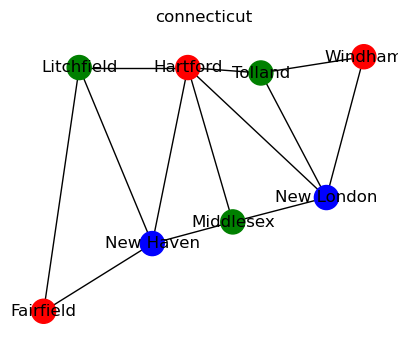

In [21]:
draw_map("connecticut", connecticut, (5,4), connecticut_colors)

<a id="three_ct"></a>
## Does the Four Color Theorem apply here?

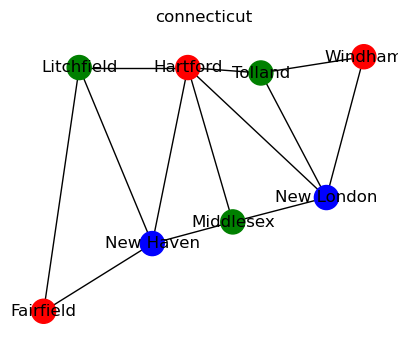

In [22]:
connecticut_colors = color_map( connecticut, ["red", "blue", "green"], trace=False)
if connecticut_colors:
    draw_map("connecticut", connecticut, (5,4), connecticut_colors)

I believe that the four colors theorem does apply here. Not only can we color Connecticut with 4 colors but we can do so as welll with 3. The theorem only states that no more than four colors are required to color the region, three colors falls within that.

## Problem 2. Color Europe Using Your solution

In [23]:
europe = {
    'coordinates': [(47, 28), (108, 14), (18, 147), (48, 83), (98, 59), (148, 57),
                 (160, 13), (63, 34), (84, 80), (82, 69), (136, 95), (194, 32),
                 (94, 97), (143, 149), (140, 111), (110, 67), (127, 40),
                 (118, 47), (111, 54), (189, 39), (202, 33), (82, 74),
                 (110, 162), (137, 102), (93, 55), (125, 32), (128, 37),
                 (122, 42), (116, 53), (124, 65), (146, 87), (138, 54),
                 (137, 41), (64, 90), (130, 22), (168, 29), (78, 55),
                 (116, 144), (122, 57), (158, 65), (122, 78), (112, 60),
                 (127, 48), (191, 118), (100, 78), (102, 35)],
 'edges': [(2, 3), (2, 33), (3, 33), (33, 36), (33, 21), (33, 8), (33, 22),
           (0, 7), (7, 36), (7, 45), (36, 21), (36, 9), (36, 44), (36, 24),
           (36, 45), (21, 8), (21, 9), (21, 44), (8, 44), (9, 44), (44, 12),
           (44, 37), (44, 40), (44, 15), (44, 41), (44, 24), (12, 22), (12, 37),
           (12, 40), (22, 37), (22, 13), (22, 43), (37, 13), (37, 14), (37, 23),
           (37, 40), (13, 14), (13, 43), (14, 23), (14, 43), (23, 10), (23, 30),
           (23, 43), (10, 40), (10, 30), (40, 15), (40, 29), (40, 30), (40, 39),
           (15, 41), (15, 29), (41, 4), (41, 24), (41, 45), (41, 18), (41, 38),
           (41, 29), (4, 24), (24, 45), (45, 1), (45, 34), (45, 25), (45, 27),
           (45, 17), (45, 28), (45, 18), (34, 25), (34, 26), (34, 32), (34, 6),
           (34, 35), (25, 26), (25, 16), (25, 27), (26, 16), (26, 42), (26, 32),
           (16, 27), (16, 42), (27, 17), (27, 42), (17, 42), (17, 28), (42, 28),
           (42, 38), (42, 31), (42, 32), (28, 18), (28, 38), (18, 38), (38, 29),
           (38, 39), (38, 31), (29, 39), (30, 39), (30, 43), (39, 5), (39, 31),
           (39, 43), (5, 31), (31, 32), (32, 35), (6, 35), (35, 19), (35, 11),
           (35, 20), (19, 11), (19, 20), (19, 43), (11, 20), (20, 43)],
 'nodes': ['Portugal', 'Malta', 'Iceland', 'Ireland', 'Liechtenstein',
           'Moldova', 'Cyprus', 'Spain', 'Netherlands', 'Luxembourg',
           'Lithuania', 'Armenia', 'Denmark', 'Finland', 'Estonia',
           'Czech Republic', 'Kosovo', 'Bosnia Herzegovina', 'Slovenia',
           'Georgia', 'Azerbaijan', 'Belgium', 'Norway', 'Latvia',
           'Switzerland', 'Albania', 'Macedonia', 'Montenegro', 'Croatia',
           'Slovakia', 'Belarus', 'Romania', 'Bulgaria', 'United Kingdom',
           'Greece', 'Turkey', 'France', 'Sweden', 'Hungary', 'Ukraine',
           'Poland', 'Austria', 'Serbia', 'Russia', 'Germany', 'Italy']}
print(europe)

{'coordinates': [(47, 28), (108, 14), (18, 147), (48, 83), (98, 59), (148, 57), (160, 13), (63, 34), (84, 80), (82, 69), (136, 95), (194, 32), (94, 97), (143, 149), (140, 111), (110, 67), (127, 40), (118, 47), (111, 54), (189, 39), (202, 33), (82, 74), (110, 162), (137, 102), (93, 55), (125, 32), (128, 37), (122, 42), (116, 53), (124, 65), (146, 87), (138, 54), (137, 41), (64, 90), (130, 22), (168, 29), (78, 55), (116, 144), (122, 57), (158, 65), (122, 78), (112, 60), (127, 48), (191, 118), (100, 78), (102, 35)], 'edges': [(2, 3), (2, 33), (3, 33), (33, 36), (33, 21), (33, 8), (33, 22), (0, 7), (7, 36), (7, 45), (36, 21), (36, 9), (36, 44), (36, 24), (36, 45), (21, 8), (21, 9), (21, 44), (8, 44), (9, 44), (44, 12), (44, 37), (44, 40), (44, 15), (44, 41), (44, 24), (12, 22), (12, 37), (12, 40), (22, 37), (22, 13), (22, 43), (37, 13), (37, 14), (37, 23), (37, 40), (13, 14), (13, 43), (14, 23), (14, 43), (23, 10), (23, 30), (23, 43), (10, 40), (10, 30), (40, 15), (40, 29), (40, 30), (40, 

In [24]:
europe_colors = color_map(europe, ["red", "blue", "green", "yellow"], trace=True)

Variable selected: Node 45, selected due to highest degree of 11.
Proposing color red for node 45.
Variable selected: Node 44, selected due to highest degree of 10.
Proposing color red for node 44.
Variable selected: Node 40, selected due to highest degree of 8.
Proposing color blue for node 40.
Variable selected: Node 41, selected due to highest degree of 8.
Proposing color blue for node 41.
Variable selected: Node 42, selected due to highest degree of 8.
Proposing color red for node 42.
Variable selected: Node 43, selected due to highest degree of 8.
Proposing color blue for node 43.
Variable selected: Node 37, selected due to highest degree of 7.
Proposing color green for node 37.
Variable selected: Node 38, selected due to highest degree of 7.
Proposing color green for node 38.
Variable selected: Node 39, selected due to highest degree of 7.
Proposing color red for node 39.
Variable selected: Node 36, selected due to highest degree of 7.
Proposing color blue for node 36.
Variable s

Here we're testing to see if the adjacent nodes are colored differently:

<a id="four_eu"></a>
#### Test Cases

In [25]:
edges = europe["edges"]
nodes = europe[ "nodes"]
colors = europe_colors
COLOR = 1

for start, end in edges:
    try:
        assert colors[start][COLOR] != colors[end][COLOR]
    except AssertionError:
        print(f"{nodes[start]} and {nodes[end]} are adjacent but have the same color.")

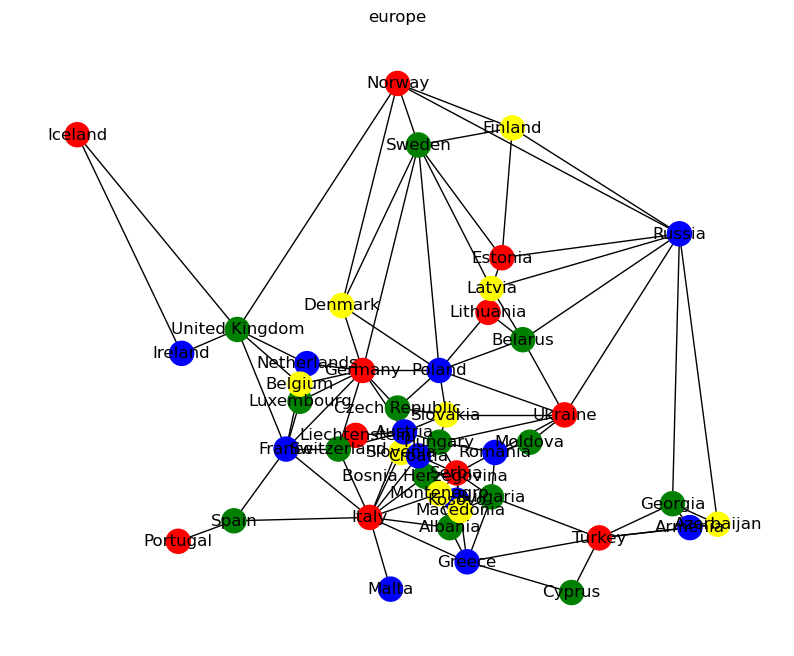

In [26]:
draw_map("europe", europe, (10,8), europe_colors)

<a id="three_eu"></a>
## Does the Four Color Theorem apply here?

In [27]:
europe_colors = color_map(europe, ["red", "blue", "green"], trace=False)
if europe_colors:
     draw_map("europe", europe, (10,8), europe_colors)

This is actually exactly what the four color theorem is about. While 3 colors cannot fully allow us to map europe, four does. We can see above this run that europe can be drawn with exactly 4, meaning the theorem holds true.

## Before You Submit...

1. Did you provide output exactly as requested?
2. Did you re-execute the entire notebook? ("Restart Kernel and Rull All Cells...")
3. If you did not complete the assignment or had difficulty please explain what gave you the most difficulty in the Markdown cell below.
4. Did you change the name of the file to `jhed_id.ipynb`?

Do not submit any other files.